In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bostoncsv/Boston.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
dataset = pd.read_csv("/kaggle/input/bostoncsv/Boston.csv")
dataset

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
dataset.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [5]:
x = dataset.iloc[:,:-1]
y= dataset["medv"]

In [6]:
x.ndim,y.ndim

(2, 1)

In [7]:
from sklearn.model_selection import train_test_split


In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=43)

In [9]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((379, 14), (127, 14), (379,), (127,))

In [10]:
from sklearn.linear_model import LinearRegression


In [11]:
model = LinearRegression()
model

LinearRegression()

In [12]:
model.fit(x_train,y_train)

LinearRegression()

In [13]:
model.coef_

array([-2.37343472e-03, -6.37884264e-02,  4.48182259e-02,  9.94564945e-03,
        2.75523777e+00, -1.61122246e+01,  3.96165483e+00,  1.18088337e-02,
       -1.30891900e+00,  3.46913316e-01, -1.26085671e-02, -9.66901227e-01,
        1.01985904e-02, -6.17354589e-01])

In [14]:
model.intercept_

34.338266747253805

In [15]:
y_pred = model.predict(x_test)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

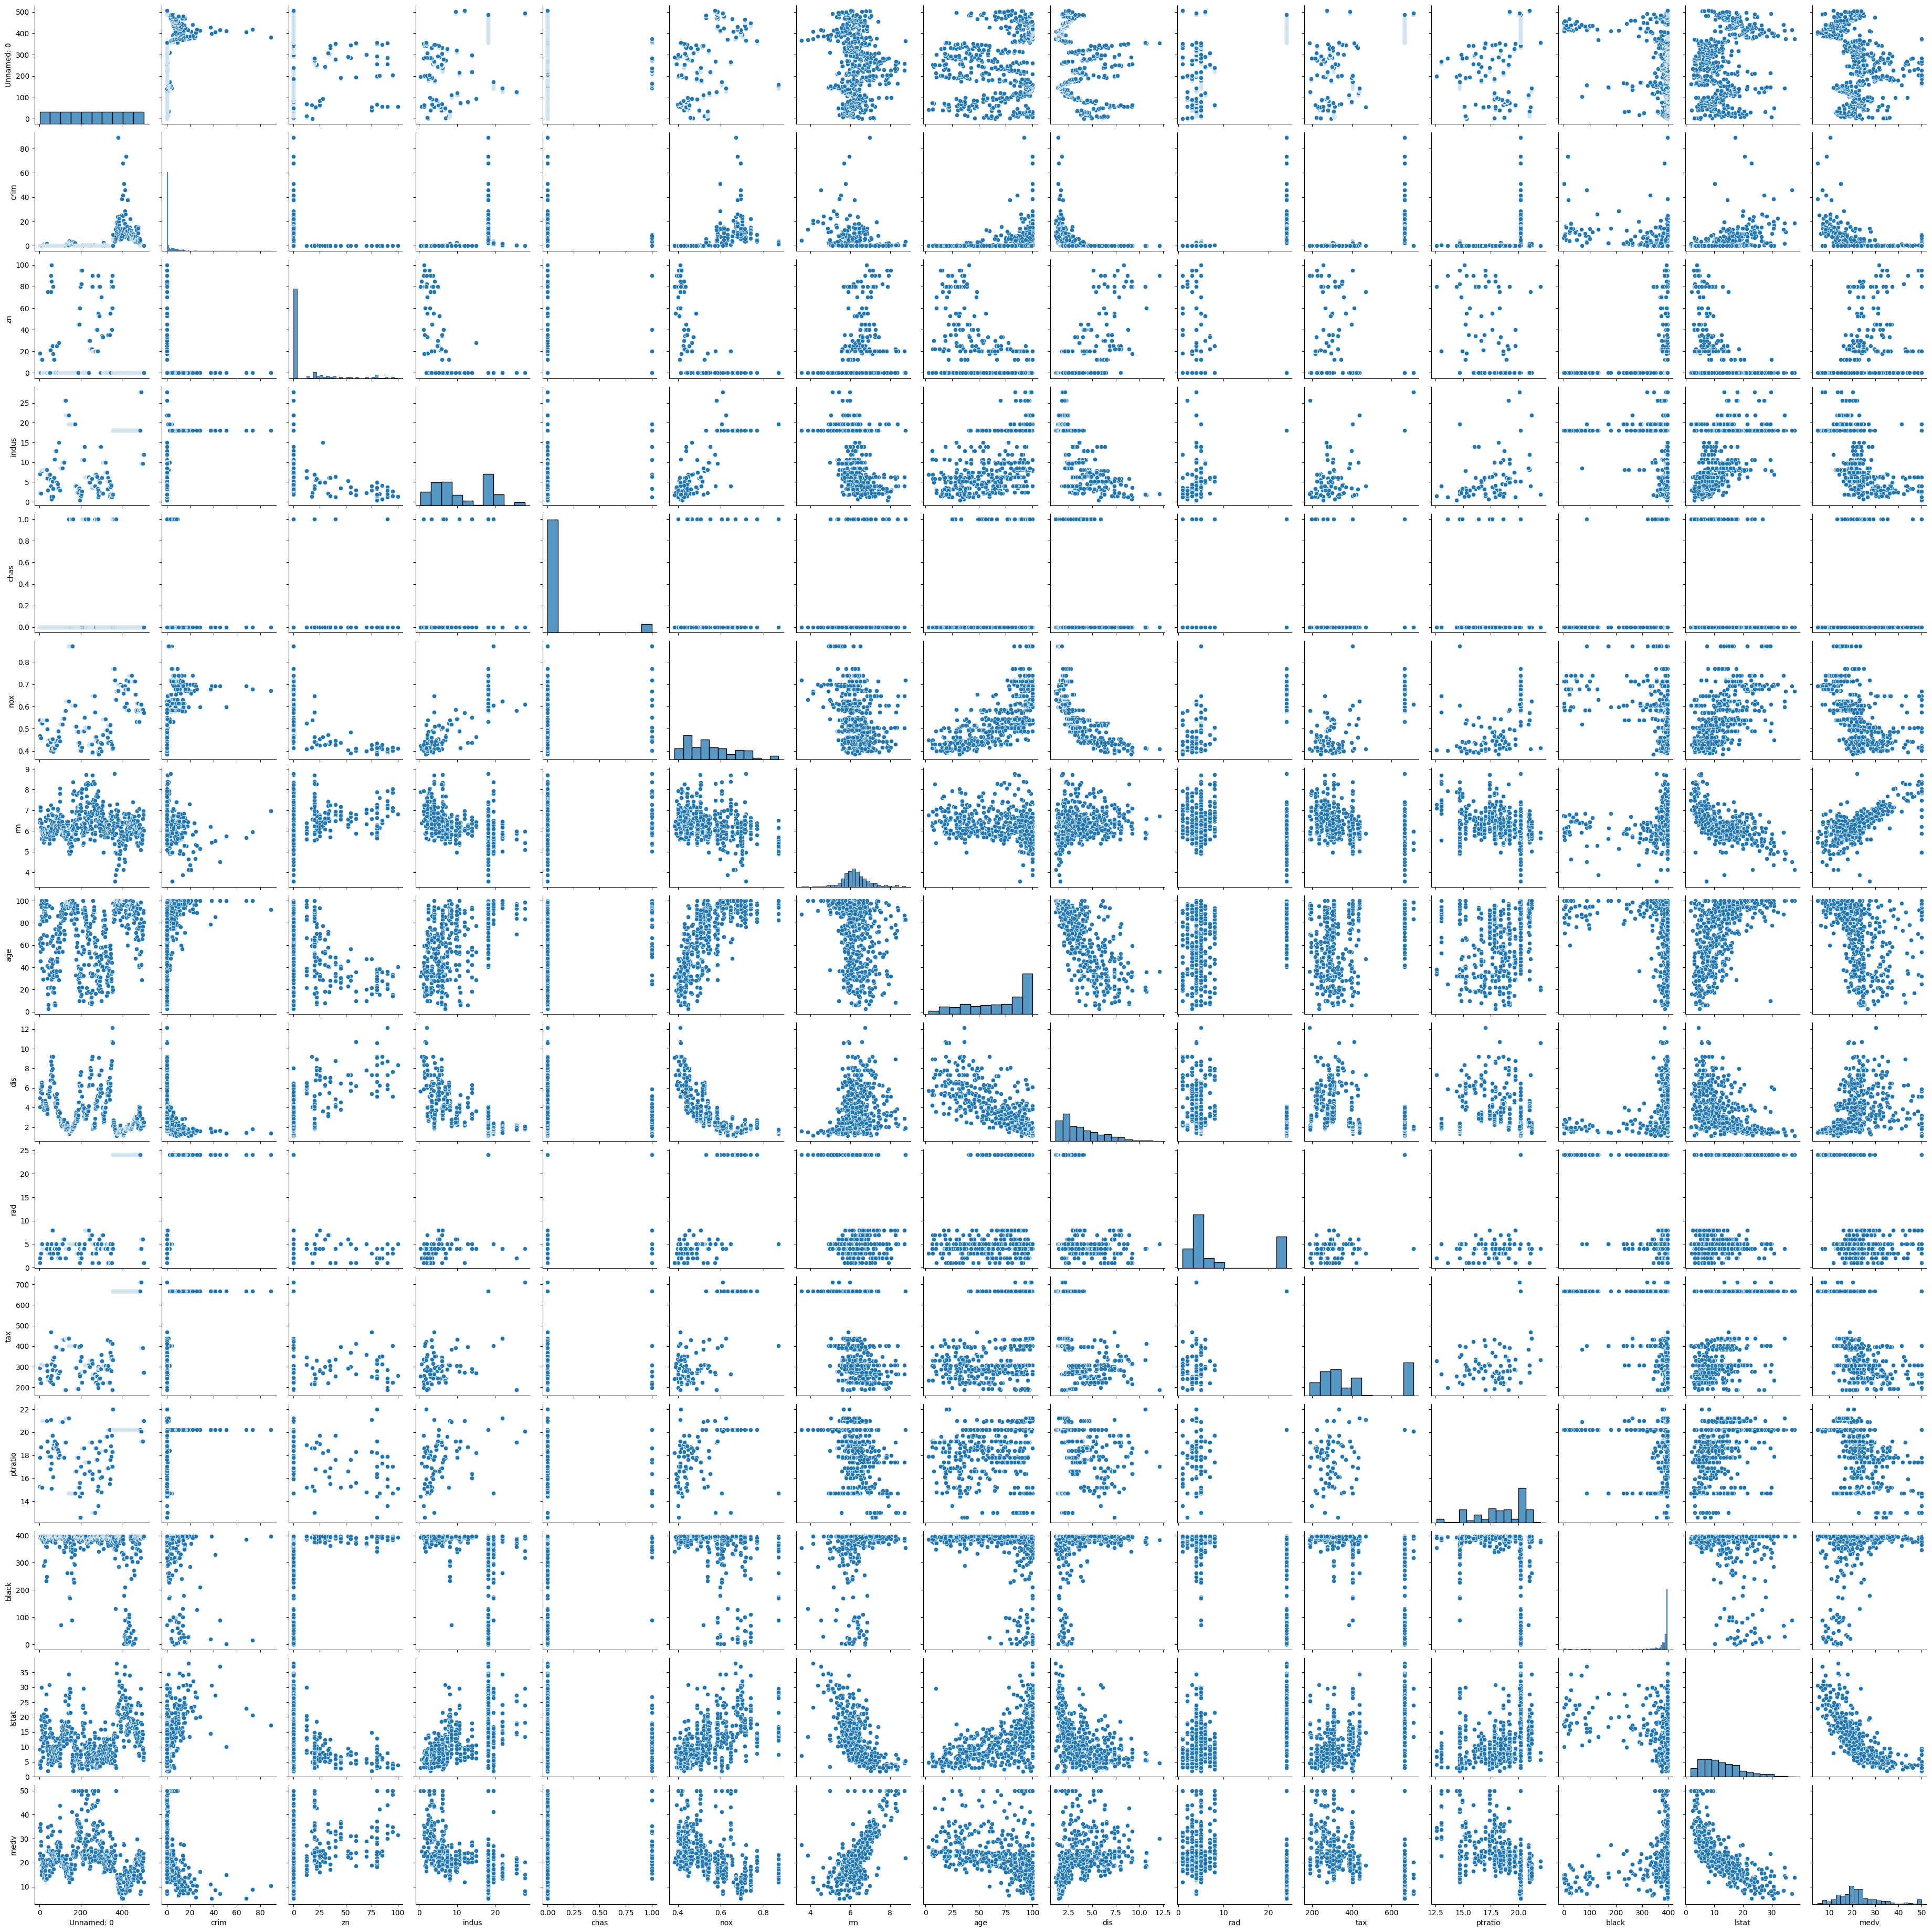

In [16]:
sns.pairplot(data=dataset)
plt.show()

<Axes: >

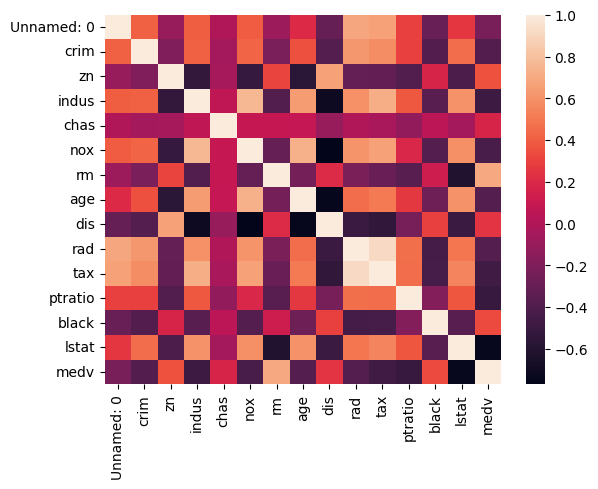

In [17]:
sns.heatmap(data=dataset.corr())

In [18]:
model.score(x_test,y_test)*100

68.79164530473756

In [19]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [20]:
mean_absolute_error(y_test,y_pred)

3.584536385717668

In [21]:
mean_absolute_percentage_error(y_test,y_pred)

0.20194623612559717

In [22]:
mean_squared_error(y_test,y_pred)

26.29750830676522